#**EXPALINABLE OTT RECOMMENDED SYSTEM**

**Importing required panda Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as pyplot


**READING THE CSV FILE**

In [ ]:
df = pd.read_csv('/content/Netflix_title_final.csv')
df.head()

,show_id,title,director,cast,country,date_added,release_year,rated by,duration,listed_in,description,type,rating
0,81193313,Chocolate,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,6.3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,7.2
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,7.2
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,6.3
4,80213643,Chip and Potato,Frank Oz,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 27, 2019",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,7.7


In [ ]:
df.info()#Information regarding the datset - The columns,Number of NOn null values in each column,Data type of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       1007 non-null   int64  
 1   title         1007 non-null   object 
 2   director      886 non-null    object 
 3   cast          991 non-null    object 
 4   country       952 non-null    object 
 5   date_added    999 non-null    object 
 6   release_year  1007 non-null   int64  
 7   rated by      1002 non-null   object 
 8   duration      1000 non-null   object 
 9   listed_in     1007 non-null   object 
 10  description   1007 non-null   object 
 11  type          1007 non-null   object 
 12  rating        1000 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 102.4+ KB


In [ ]:
df.describe()#Stastical measures of the numerical attributes in the dataset - mean,max,min,count,standard deviation...etc

,show_id,release_year,rating
count,1.007000e+03,1007.000000,1000.000000
mean,7.332395e+07,2011.287984,8.020000
std,1.632198e+07,11.037731,1.215935
min,2.698800e+05,1954.000000,1.100000
25%,7.019572e+07,2009.000000,7.000000
50%,8.011533e+07,2015.000000,8.100000
75%,8.105786e+07,2019.000000,9.000000
max,8.122720e+07,2019.000000,10.000000


In [ ]:
print(df.size)#Total number of values in the dataset
r,c=df.shape#Number of rows and columns in the dataset
print("Number of rows = ",r)
print("Number of columns = ",c)

13091
Number of rows =  1007
Number of columns =  13


#**DATA PREPROCESSING**


In [ ]:
df.loc[(df['type'] == 'TV Show'), 'title'] = df['title']+' - '+df['duration']
df.head()

,show_id,title,director,cast,country,date_added,release_year,rated by,duration,listed_in,description,type,rating
0,81193313,Chocolate - 1 Season,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,6.3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,7.2
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,7.2
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,6.3
4,80213643,Chip and Potato - 2 Seasons,Frank Oz,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 27, 2019",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,7.7


In [ ]:
df.loc[(df['type'] == 'TV Show'), 'duration'] = np.nan
df.head(11)

,show_id,title,director,cast,country,date_added,release_year,rated by,duration,listed_in,description,type,rating
0,81193313,Chocolate - 1 Season,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,NaN,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,6.3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,7.2
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,7.2
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,6.3
4,80213643,Chip and Potato - 2 Seasons,Frank Oz,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 27, 2019",2019,TV-Y,NaN,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,7.7
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,9.2
6,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie,NaN
7,81172841,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",NaN,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie,6.2
8,81172899,Payday,Cheta Chukwu,"Baaj Adebule, Ebiye Victor, Meg Otanwa, Bisola...",Nigeria,"November 29, 2019",2018,TV-MA,110 min,"Comedies, Independent Movies, International Mo...","After an expensive night out, two flatmates ge...",Movie,9.8
9,81172908,The Accidental Spy,Roger Russell,"Ramsey Nouah, Christine Allado, Ayo Makun, Emm...",Nigeria,"November 29, 2019",2017,TV-14,104 min,"Action & Adventure, Comedies, International Mo...","Nursing a broken heart, an IT specialist moves...",Movie,9.7


In [ ]:
df.isnull().sum()

show_id           0
title             2
director        121
cast             16
country          55
date_added        8
release_year      0
rated by          5
duration        121
listed_in         0
description       0
type              0
rating            7
dtype: int64

**Replacing Values**

In [ ]:
df['duration'].replace(np.nan, '60 min',inplace=True)
df['rated by'].replace('TV-G', 'G',inplace=True)#the value TVG is replaced with the value G in the rated by column.Since inplace = true is used the change is reflected in the original dataset
df['rated by'].replace('UR', 'NR',inplace=True)
df['rated by'].replace('TV-PG', 'PG',inplace=True)

**Extracting numbers from the column duration**

In [ ]:
import re as re
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
df['duration']=df['duration'].apply(lambda x: find_number(x))

In [ ]:
df["duration"] = pd.to_numeric(df["duration"])#replacing the duration column with string values to duration column with numeric values
df.head()

,show_id,title,director,cast,country,date_added,release_year,rated by,duration,listed_in,description,type,rating
0,81193313,Chocolate - 1 Season,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,60,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,6.3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,7.2
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,7.2
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,6.3
4,80213643,Chip and Potato - 2 Seasons,Frank Oz,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 27, 2019",2019,TV-Y,60,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,7.7


**Replacing null values**

In [ ]:
mis=['director','cast','country','date_added']
for i in mis:
  df[i].fillna(value='Unknown', inplace=True)#Null value in the Categorical features 'director','cast','country','date_added' are filled with the value 'Unknown'

df['rated by'].fillna(value='NR', inplace=True)
df.head()


,show_id,title,director,cast,country,date_added,release_year,rated by,duration,listed_in,description,type,rating
0,81193313,Chocolate - 1 Season,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,60,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,6.3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,"November 30, 2019",2019,G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,7.2
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,7.2
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,6.3
4,80213643,Chip and Potato - 2 Seasons,Frank Oz,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 27, 2019",2019,TV-Y,60,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,7.7


In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()#Extracting all the categorical features and storing it in the dataframe obj_df
obj_df.head(5)

,title,director,cast,country,date_added,rated by,listed_in,description,type
0,Chocolate - 1 Season,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",TV-14,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,"November 30, 2019",G,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",TV-14,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",TV-14,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,Chip and Potato - 2 Seasons,Frank Oz,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 27, 2019",TV-Y,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [ ]:
num_features = df.select_dtypes(include = ['int64']).copy()#Extracting all the features with data type integer and storing it in the dataframe num_features
num_features.tail(5)

,show_id,release_year,duration
1002,80174683,2015,60
1003,70103759,2009,96
1004,81077451,2013,99
1005,81014345,2017,88
1006,80986854,2019,60


In [ ]:
num_features1 = df.select_dtypes(include = ['float64']).copy()#Extracting all the feature with data type float and storing it in the dataframe num_features1
num_features1.tail(5)

,rating
1002,7.2
1003,6.6
1004,8.6
1005,7.2
1006,8.2


In [ ]:
missing_values = ['na', '--', 'n/a', 'NA', '-']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')#Fill the null values in the dataframe num_features1 with the mean value
transformed_values = imputer.fit_transform(num_features1)#num_features1 has the attribute rating
num_features1 = pd.DataFrame(transformed_values,columns=['rating'])#Storing the filled missing value dataframe into the original datfarme

**Droping the rows which still has missing value **

In [ ]:
obj_df.dropna(how='any',axis=0,inplace=True) 
num_features.dropna(how='any',axis=0,inplace=True) 

**Concatinating the dataframes into df3 after filling in all null values/missing values**

In [ ]:
df3 = pd.concat([obj_df,num_features,num_features1], axis=1,join="inner")#join="inner' returns a dataframe with only those rows that have common characteristics. 
df3.head()

,title,director,cast,country,date_added,rated by,listed_in,description,type,show_id,release_year,duration,rating
0,Chocolate - 1 Season,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",TV-14,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,81193313,2019,60,6.3
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,"November 30, 2019",G,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,81197050,2019,67,7.2
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",TV-14,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,81213894,2019,135,7.2
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",TV-14,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,81082007,2019,106,6.3
4,Chip and Potato - 2 Seasons,Frank Oz,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 27, 2019",TV-Y,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,80213643,2019,60,7.7


**LABEL ENCODING**

In label encoding , we replace the categorical value with a numeric value between 0 and the number of unique classes minus 1

Here categorical features are stored in the dataframe obj_df



In [ ]:
for x in obj_df.columns:
    print(x ,':', len(obj_df[x].unique()))

title : 1003
director : 787
cast : 956
country : 146
date_added : 278
rated by : 10
listed_in : 205
description : 1004
type : 2


In [ ]:
le = LabelEncoder()
for i in obj_df.columns:
  obj_df[i]=le.fit_transform(obj_df[i])#Here categorical features are encoded and stored in the same dataframe obj_df
obj_df.head()

,title,director,cast,country,date_added,rated by,listed_in,description,type
0,149,729,348,80,204,5,174,320,1
1,294,414,197,144,204,0,123,415,0
2,921,7,830,49,204,5,89,55,0
3,79,458,576,35,202,5,137,272,0
4,148,225,8,13,200,7,188,572,1


**Concatinating the dataframes into a new dataframe 'data' after label encoding of the categorical values**

In [ ]:
data = pd.concat([obj_df,num_features,num_features1], axis=1,join="inner")#join="inner' returns a dataframe with only those rows that have common characteristics. 
data.head()

,title,director,cast,country,date_added,rated by,listed_in,description,type,show_id,release_year,duration,rating
0,149,729,348,80,204,5,174,320,1,81193313,2019,60,6.3
1,294,414,197,144,204,0,123,415,0,81197050,2019,67,7.2
2,921,7,830,49,204,5,89,55,0,81213894,2019,135,7.2
3,79,458,576,35,202,5,137,272,0,81082007,2019,106,6.3
4,148,225,8,13,200,7,188,572,1,80213643,2019,60,7.7


In [ ]:
df3.isnull().sum()

title           0
director        0
cast            0
country         0
date_added      0
rated by        0
listed_in       0
description     0
type            0
show_id         0
release_year    0
duration        0
rating          0
dtype: int64

#**VISUALIZATION AND EXPLORATORY DATA ANALYSIS**

To display the five point summary and visualize whether outliers are present in the attribute duration using box plot.

Observation - Points above the value 164 and below 16 are observed to be outliers

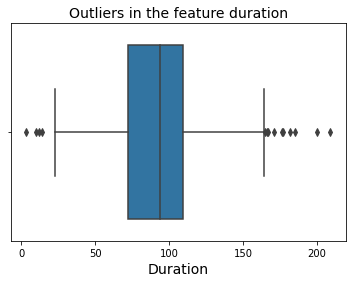

In [ ]:
ax = sns.boxplot(x='duration', data=df3)
ax.set_ylabel(None);
ax.set_xlabel('Duration', fontsize=14);
ax.set_title('Outliers in the feature duration', fontsize=14);


To display the five point summary and visualize whether outliers are present in the attribute rating using box plot.

Observation - Points below the value 4 are observed to be outliers

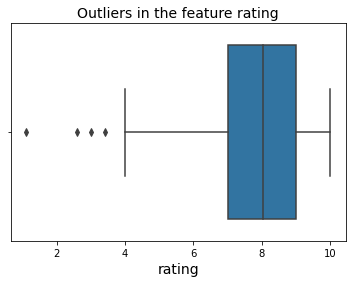

In [ ]:
ax = sns.boxplot(x='rating', data=df3)
ax.set_ylabel(None);
ax.set_xlabel('rating', fontsize=14);
ax.set_title('Outliers in the feature rating', fontsize=14);

**Five point summary - min,Q1,Q2(median),Q3,max**

In [ ]:
def outliers(df3,col_name):
    print(col_name)
    q1 = df3[col_name].quantile(0.25)#Finding first quartile - 25%
    q3 = df3[col_name].quantile(0.75)#Finding third quartile - 75%
    q2=  df3[col_name].quantile(0.50)#Finding second quartile - 50%
    data_min, data_max = min(df3[col_name]), max(df3[col_name])
    print('\nMin: %.3f' % data_min)
    print('Q1: %.3f' % q1)
    print('Median: %.3f' % q2)
    print('Q3: %.3f' % q3)
    print('Max: %.3f' % data_max)
    iqr = q3 - q1  
    low = q1- 1.48*iqr
    high = q3+ 1.48*iqr
    print('Lower bound: %.3f'% low)
    print('Upper bound: %.3f\n'% high)
    print("Outliers\n",df3.loc[(df3[col_name] < low) | (df3[col_name] > high), col_name])#Finding the identified outliers
    print("\n")

    ls=df3.index[(df3[col_name] < low) | (df3[col_name] > high)] #storing the outliers of the numeric features in a list 
    return ls

In [ ]:
lst1=[]#used to store all the ouliers
for i in ['duration','rating']:#considering the numerical features duration and rating for identifying outliers
  lst1.extend(outliers(df3,i))

def remove(df3,l):
  df3 = df3.drop(index=l)#Removing all the ouliers present.
  return df3
  
df3=remove(df3,lst1)#The dataset after removing outliers is stored in df3
print(df3.shape)

duration

Min: 3.000
Q1: 72.000
Median: 94.000
Q3: 109.000
Max: 209.000
Lower bound: 17.240
Upper bound: 163.760

Outliers
 16     209
50     166
131    200
164    185
207     14
403    182
412    171
444     10
500    167
540    164
552    177
665    176
746     12
748      3
897    165
Name: duration, dtype: int64


rating

Min: 1.100
Q1: 7.000
Median: 8.020
Q3: 9.000
Max: 10.000
Lower bound: 4.040
Upper bound: 11.960

Outliers
 409    4.0
859    1.1
929    3.0
956    3.4
975    2.6
Name: rating, dtype: float64


(985, 13)


**Visualizing duration feature in a box plot after removing the outliers**

Text(0.5, 1.0, 'Duration without Outliers')

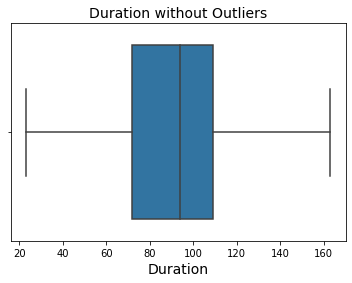

In [ ]:
ax = sns.boxplot(x='duration', data=df3)
ax.set_ylabel(None);
ax.set_xlabel('Duration', fontsize=14)
ax.set_title('Duration without Outliers', fontsize=14)


**Correlation analysis using heat map**

The highly negative correlated values are represented by dark red colour

The highly positive correlated values are represented by dark green colour

The lighter shades of red and green represent less correlation or no correlation between features

Since the diagonal cells are self mapped to each other so they are highly positively correlated

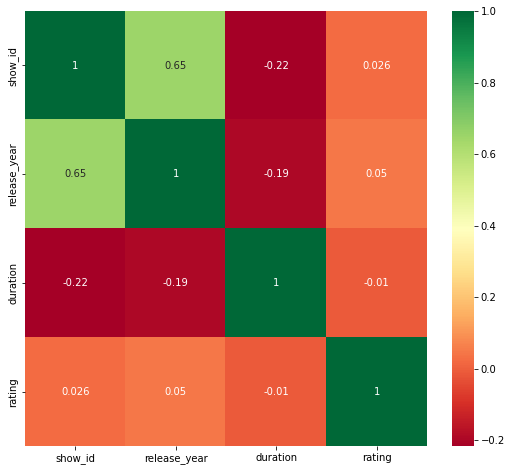

In [ ]:
plt.figure(figsize=(9,8))
g = sns.heatmap(data=df3.corr(),annot=True,cmap="RdYlGn")#corr() function is used to find the correlation value

**Histogram**

Histogram is used to observe the frequency of individual numeric attributes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


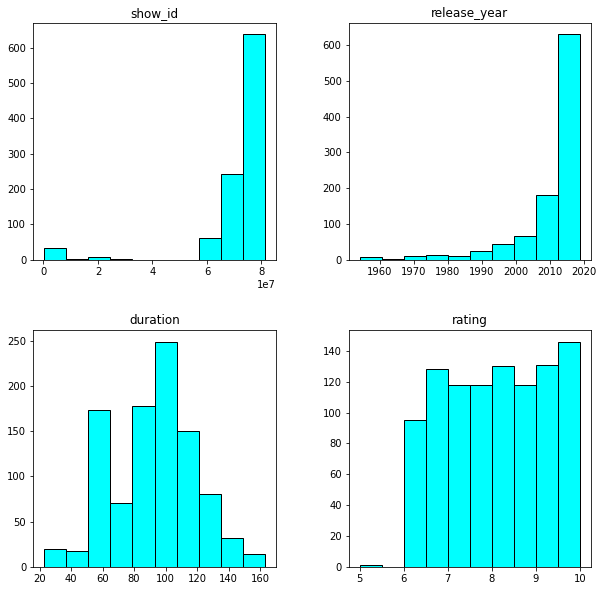

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df3.hist(ax = ax, color="cyan", bins=10, grid=False, edgecolor="black")
plt.show()

**Histogram Plot**

The count of movies or Tv shows released in the past years

Observation - The most number of movies or tv shows were released in 2019

The feature release year is negatively(left) skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Movie or TV show Released Years\n')

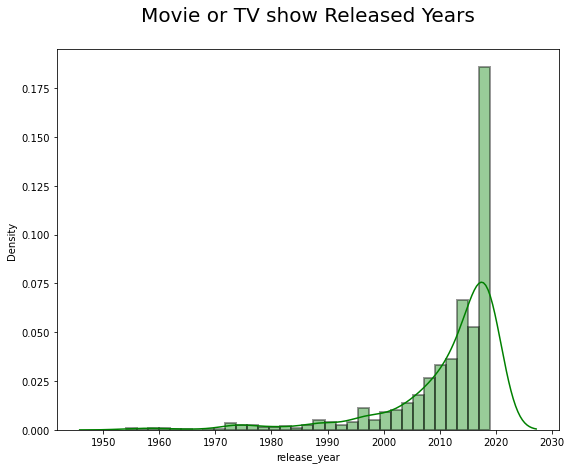

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(df3['release_year'],color='green', hist_kws=dict(edgecolor="black", linewidth=2))
df3['release_year'].skew()
plt.title('Movie or TV show Released Years\n', fontsize=20)

**Catplot**

The plot involves comparing two features which are rated by and rating

**Observation**

For rated by G we observe that TV shows have more rating than movie

For rated by TV-Y7 we observe that movies have a higher rating than TV shows

For rated by PG-13 we observe that there are no TV shows therefore there is no rating

Text(0.5, 1.0, 'Ratings given for maturity rating\n')

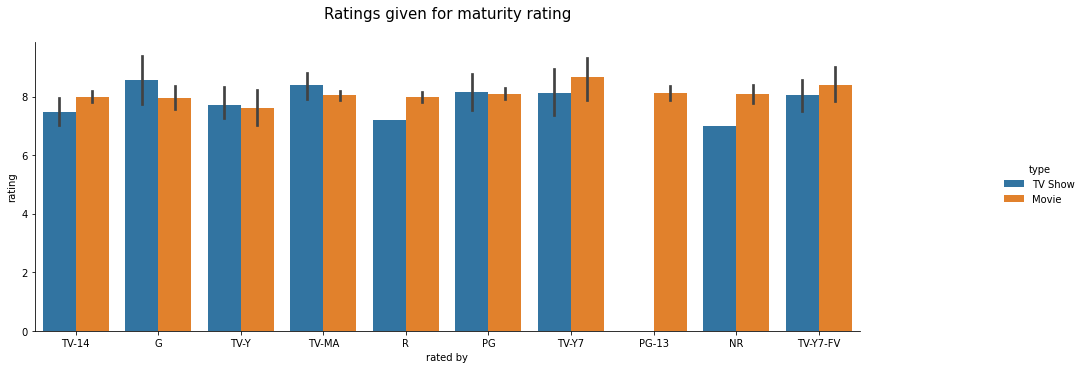

In [ ]:
g1=sns.catplot(x='rated by', y='rating', hue='type', kind='bar', data=df3)
g1.fig.set_figwidth(16.27)
g1.fig.set_figheight(4.7)
plt.title('Ratings given for maturity rating\n', fontsize=15)

**Pairplot**

A Pairplot allows us to see both distribution of single variables(univariant) and relationships between two variables(bivariant).

Observation

The plot is observed for the numerical features - show_id,release_year,duration,rating

Univariant distribution occurs when the features are mapped to itself and is represented by a histogram here

Bivariant distribution occurs when the features are mapped to other numerical features and is represented by a scatterplot here



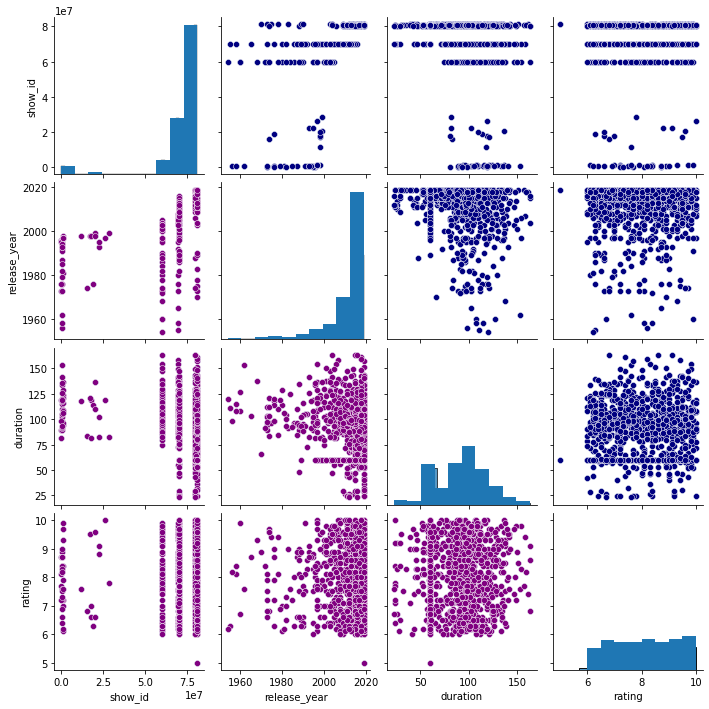

In [ ]:
g1 = sns.pairplot(df3)
g1.map_upper(sns.scatterplot,color='navy')
g1.map_lower(sns.scatterplot, color='purple')
g1.map_diag(plt.hist)

**Swarmplot**

This gives a better representation of the distribution of values. 

We can observe that there are two TV shows that are poorly rated compared to the others

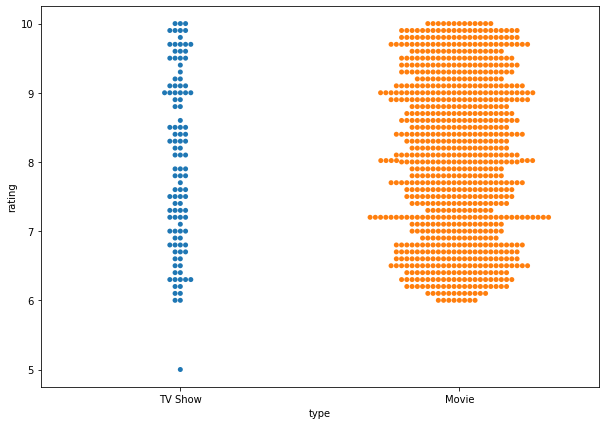

In [ ]:
plt.figure(figsize=(10,7))
sns.swarmplot(x = df3.type, y = df3.rating)

**Piechart**



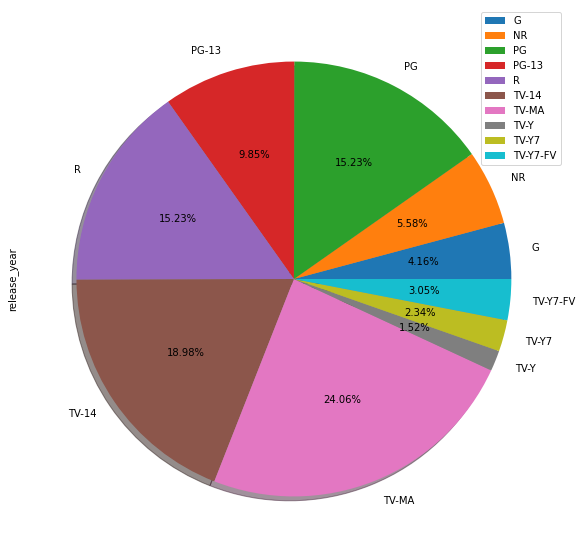

In [ ]:
df3.groupby(['rated by']).count().plot(kind='pie', y='release_year', shadow = True,figsize=(30, 10),autopct = "%0.2f%%")

**Lineplot**

We observe that most of the movies or tv shows belong to the country south Korea 

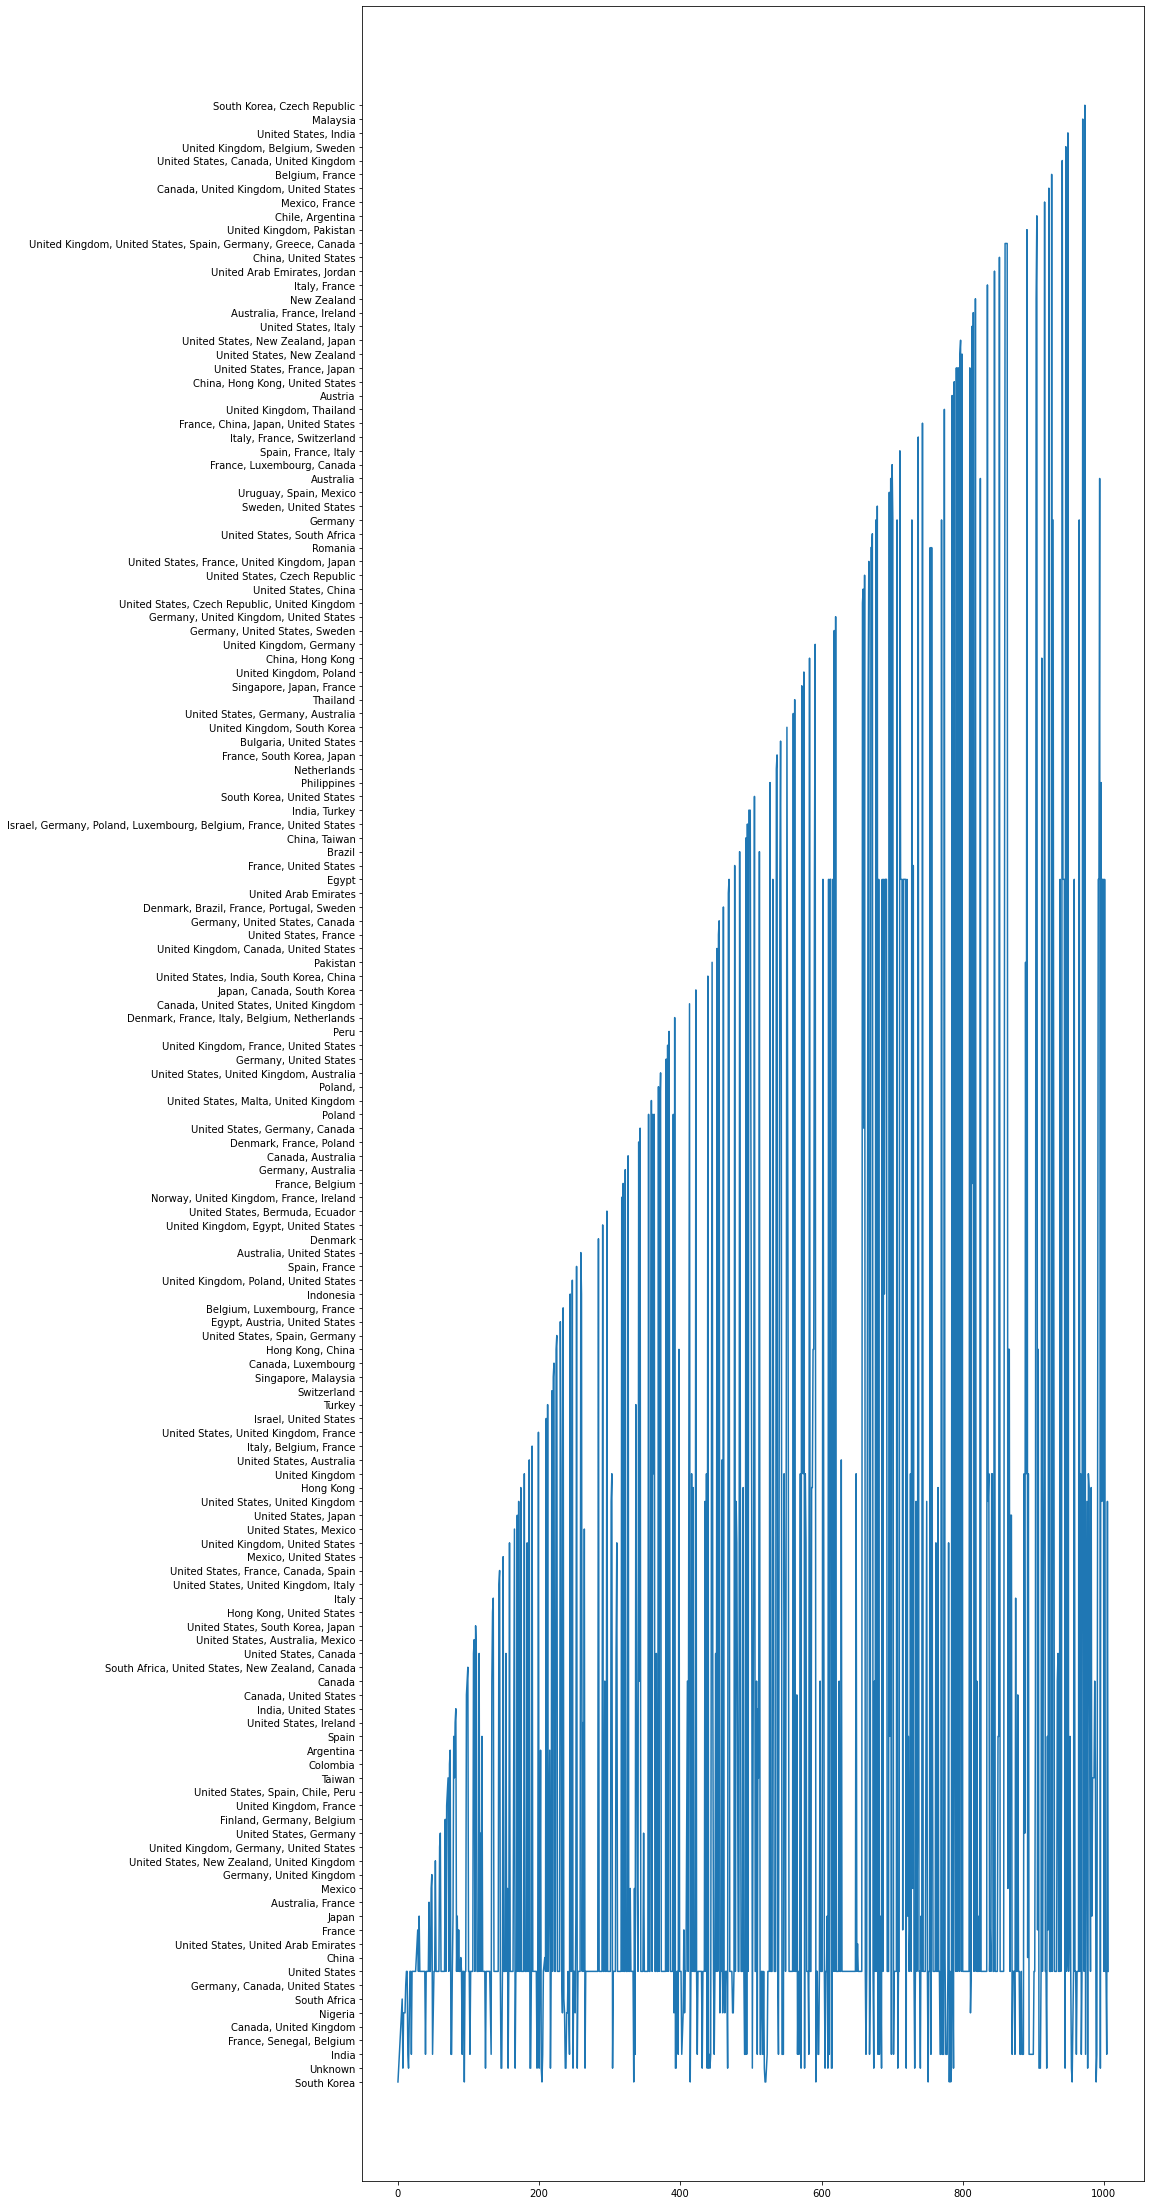

In [ ]:
plt.figure(figsize=(14,40))
plt.plot(df3['country'])

**Bar plot**

Nearly 300 movies are rated as suitable for matured audience where as only 20 tv shows are rated as suitable for matured audience

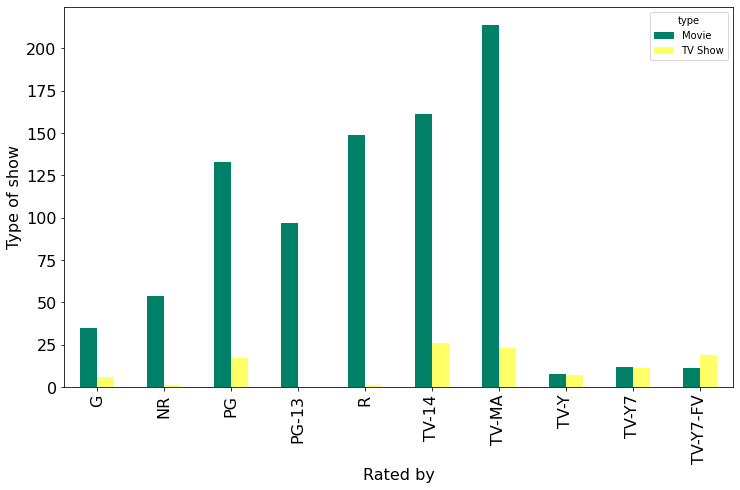

In [ ]:
index = ['TV-14','TV-MA','TV-PG','PG-13','PG','R','G']
internet_index = pd.crosstab(index=df3['rated by'], columns=df3.type)
internet_index.plot.bar(colormap='summer',fontsize=16, figsize=(12,7))
plt.ylabel('Type of show', fontsize=16)
plt.xlabel('Rated by', fontsize=16)
plt.show()

**Scatter plot**

We can observe that 2019 has the maximum number of tv shows or movies released

Very few movies and TV shows released between 1940 and 1990


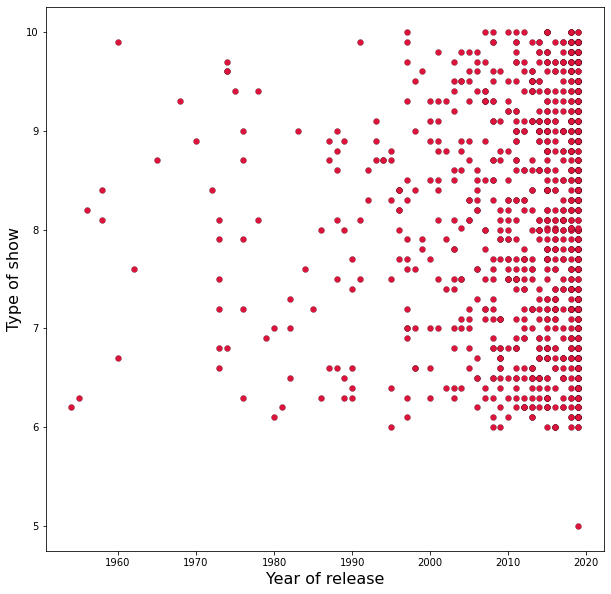

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df3.release_year,df3.rating,edgecolor="black",linewidth=0.2,color='crimson')
plt.ylabel('Type of show', fontsize=16)
plt.xlabel('Year of release', fontsize=16)
plt.show()

**STRIP PLOT**

Movies rated for matured audience has most of it's rating between 6 to 10

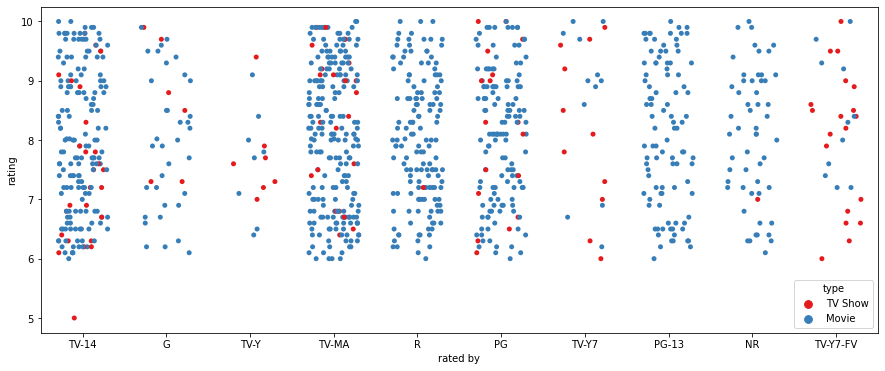

In [ ]:
plt.figure(figsize=(15,6))
sns.stripplot(x=df3['rated by'] ,palette="Set1", y = df3.rating , jitter=0.3, hue=df3.type)

**VIOLIN PLOT**

Violin Plot is used to visualize the distribution of type attribute to the ratings.

We observe that it Tv show has more density at rating 7 and movie at 9.5

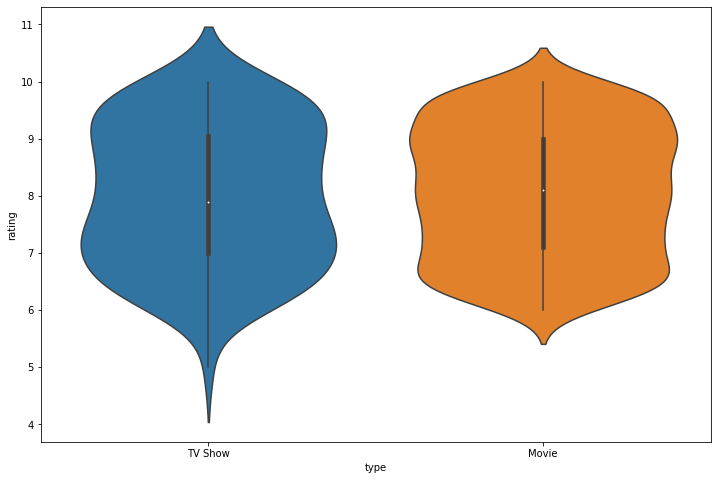

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="type", y="rating", data=df3)

#**Feature scaling**

**Normalization**                                                               
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. 

It is also known as Min-Max scaling.

**MinMax scaler**

(X - Min(X)) / (Max(X) - Min(X))

In [ ]:
scaling = df3.select_dtypes(include = ['int64','float64']).copy()#The data frame scaling is stored with numeric features

In [ ]:
df_min_max_scaled = scaling.copy()
for column in df_min_max_scaled.columns:
  df3[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
df3.head(3)

,title,director,cast,country,date_added,rated by,listed_in,description,type,show_id,release_year,duration,rating
0,Chocolate - 1 Season,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",TV-14,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,0.999581,1.0,0.264286,0.26
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,"November 30, 2019",G,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,0.999628,1.0,0.314286,0.44
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",TV-14,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,0.999836,1.0,0.800000,0.44


**Standardization**

**Z-score** 

(x-μ)/σ

In [ ]:
'''df_z_scaled = scaling.copy()
for column in df_z_scaled.columns:
    df3[column] = (df_z_scaled[column] -df_z_scaled[column].mean()) / df_z_scaled[column].std()    
df3.head()'''

'df_z_scaled = scaling.copy()\nfor column in df_z_scaled.columns:\n    df3[column] = (df_z_scaled[column] -df_z_scaled[column].mean()) / df_z_scaled[column].std()    \ndf3.head()'